In [884]:
# Import the necessary libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)


df= pd.read_csv("survey_results_public.csv")

# Data Exploration & Cleaning

In [885]:
df['EdLevel'].fillna('Something else', axis=0, inplace=True)    #Fill missing values

In [886]:
 df.drop(['US_State', 'UK_Country', 'ResponseId', 'CompTotal'], axis=1, inplace=True)    #Drop columns without meaning

In [887]:
# Rename the Country name
df['Country'] = df['Country'].replace(['United Kingdom of Great Britain and Northern Ireland'], 'United Kingdom') 

In [888]:
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)    #Rename the column to Salary

In [889]:
# Select only the European countries

df = df[df['Country'].isin(['Slovakia', 'Netherlands','Russian Federation', 'Austria', 'United Kingdom',
                           'Sweden','Spain','Germany','France', 'Switzerland', 'Poland', 'Ukraine','Portugal', 'Italy', 'Bulgaria', 'Greece',
                           'Ireland','Hungary', 'Belgium','Albania','Romania','Lithuania', 'Slovenia','Croatia','Czech Republic','Denmark',
                            'Serbia','Estonia','Finland','Bosnia and Herzegovina','Norway','Belarus','Luxembourg','Malta','Cyprus',
                            'Latvia','Iceland','Republic of Moldova','Montenegro','Monaco','Liechtenstein'])]

In [890]:
df.head()

,MainBranch,Employment,Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,Salary
0,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,I am a student who is learning to code,"Student, full-time",Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,I am a developer by profession,Employed full-time,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",100 to 499 employees,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [891]:
df['Country'].sort_values().unique()

array(['Albania', 'Austria', 'Belarus', 'Belgium',
       'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy',
       'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta',
       'Monaco', 'Montenegro', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Republic of Moldova', 'Romania', 'Russian Federation',
       'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Ukraine', 'United Kingdom'], dtype=object)

In [892]:
# Keep the columns we need

df = df[['EdLevel','Country', 'YearsCodePro',"Employment", 'Age','Age1stCode', 'DevType', 'LanguageHaveWorkedWith', 'OrgSize', 'OpSys', 'Salary']]

In [893]:
# Keep only the full-time jobs

df = df[df["Employment"]== "Employed full-time"]

In [894]:
df = df.dropna()

In [895]:
# Filter the salary range

df = df[df["Salary"] <=250000]
df = df[df["Salary"] >= 10000]

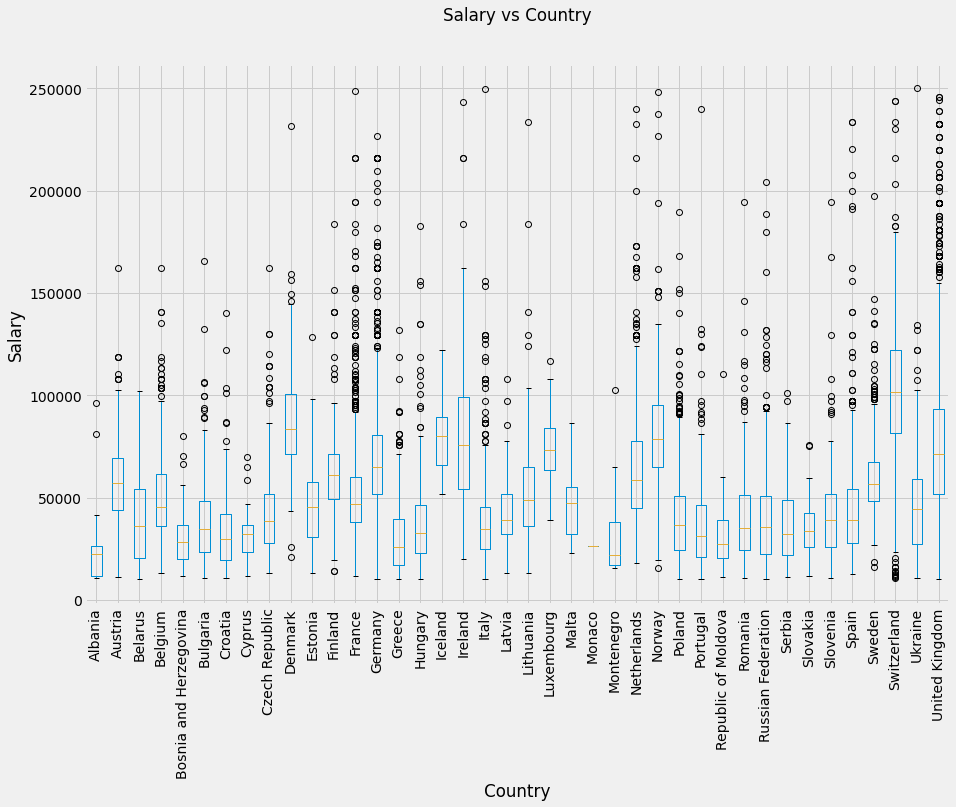

In [896]:
# Check for outliers 

fig, ax = plt.subplots(1,1, figsize=(15,10))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [897]:
df.YearsCodePro.unique()

array(['4', '5', '6', '2', '18', '21', '16', '10', '3', '1', '12', '8',
       '14', '26', '11', '25', '7', '22', '15', '13', '9', '20', '24',
       '27', '23', '30', '17', 'Less than 1 year', '28', '19', '35', '29',
       '38', '33', '36', '40', '34', '32', '42', '41', '39', '31', '37',
       '47', '43', 'More than 50 years', '45'], dtype=object)

In [898]:
# Replace strings with numerical in YearsCodePro variable

def experience(x):
    if x == 'More than 50 years':
        return 55
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(experience)

In [899]:
df.YearsCodePro.unique()

array([ 4. ,  5. ,  6. ,  2. , 18. , 21. , 16. , 10. ,  3. ,  1. , 12. ,
        8. , 14. , 26. , 11. , 25. ,  7. , 22. , 15. , 13. ,  9. , 20. ,
       24. , 27. , 23. , 30. , 17. ,  0.5, 28. , 19. , 35. , 29. , 38. ,
       33. , 36. , 40. , 34. , 32. , 42. , 41. , 39. , 31. , 37. , 47. ,
       43. , 55. , 45. ])

In [900]:
df.EdLevel.unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)', 'Primary/elementary school',
       'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', 'Something else',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

In [901]:
# Parsing degree variable

def education (x):
    if 'Professional degree' in x or 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if  'Other doctoral degree' in x:
        return 'Post Grad'
    return 'Less than a Bachelors'

df["EdLevel"] = df['EdLevel'].apply(education)

In [902]:
df.EdLevel.unique()

array(['Master’s degree', 'Bachelor’s degree', 'Less than a Bachelors',
       'Post Grad'], dtype=object)

In [903]:
df.DevType.unique()

array(['Data scientist or machine learning specialist',
       'Developer, back-end',
       'Developer, desktop or enterprise applications;Developer, back-end',
       ..., 'Developer, full-stack;Engineer, data;Scientist;Designer',
       'Developer, back-end;Database administrator;DevOps specialist;Product manager',
       'Developer, front-end;Developer, desktop or enterprise applications;Developer, full-stack;Developer, back-end;Developer, QA or test;Developer, embedded applications or devices;Engineering manager;Educator'],
      dtype=object)

In [904]:
# Parsing developer types

def dev_type(x):
    if 'full-stack' in x:
        return 'Full-stack Developer'
    if 'back-end' in x:
        return 'Back-end Developer'
    if 'front-end' in x:
        return 'Front-end Developer'
    if 'mobile' in x:
        return 'Mobile Developer'
    if 'DevOps' in x: 
        return 'DevOps Specialist'
    if 'Data scientist' in x:
        return 'Data Scientist or ML Specialist'
    if 'Data engineer' in x:
        return 'Data Engineer'
    if 'analyst' in x:
        return 'Data or Business Analyst'
    if 'game' in x:
        return 'Game Developer'
    if 'QA' in x:
        return 'QA tester'
    if 'researcher' in x:
        return 'Academic Reseacher'
    if 'Senior Executive' in x:
        return 'Senior Executive'
    if 'System administrator' in x:
        return 'System Administrator'
    if 'reliability' in x:
        return 'Engineer, Site Reliability'
    if 'Product manager' in x:
        return 'Product Manager'
    if 'Database' in x:
        return 'Database Administrator'
    if 'Engineering manager' in x:
        return 'Engineering Manager'
    

df['DevType'] = df['DevType'].apply(dev_type)

In [905]:
# Sort them in aplphabetical order

df['DevType'].sort_values().unique()

array(['Academic Reseacher', 'Back-end Developer',
       'Data Scientist or ML Specialist', 'Data or Business Analyst',
       'Database Administrator', 'DevOps Specialist',
       'Engineer, Site Reliability', 'Engineering Manager',
       'Front-end Developer', 'Full-stack Developer', 'Game Developer',
       'Mobile Developer', 'Product Manager', 'QA tester',
       'Senior Executive', 'System Administrator', None], dtype=object)

In [906]:
df.DevType.value_counts()

Full-stack Developer               7657
Back-end Developer                 3685
Front-end Developer                1011
Mobile Developer                    522
Data Scientist or ML Specialist     512
Academic Reseacher                  315
DevOps Specialist                   290
Data or Business Analyst            144
QA tester                           125
System Administrator                122
Game Developer                      121
Engineering Manager                 102
Senior Executive                     58
Product Manager                      43
Engineer, Site Reliability           31
Database Administrator               16
Name: DevType, dtype: int64

In [907]:
df.LanguageHaveWorkedWith.unique()

array(['C++;Python',
       'Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;TypeScript',
       'C;C++;Java;Perl;Ruby', ...,
       'Groovy;HTML/CSS;Java;JavaScript;Node.js;PHP;PowerShell;TypeScript',
       'Bash/Shell;C#;C++;Go;Groovy;HTML/CSS;Java;JavaScript;Kotlin;Node.js;PHP;Python;Scala;SQL;TypeScript',
       'Bash/Shell;C;Go;Java;JavaScript;Perl;SQL'], dtype=object)

In [908]:
# Parsing programming languages 

def prog_lang(x):
    if 'JavaScript' in x:
        return 'JavaScript'
    if 'HTML/CSS' in x:
        return 'HTML/CSS'
    if 'PHP' in x:
        return 'PHP'
    if 'Python' in x:
        return 'Python'
    if 'Java' in x: 
        return 'Java'
    if 'Bash/Shell' in x:
        return 'Bash/Shell'
    if 'C++' in x:
        return 'C++'
    if 'C' in x:
        return 'C'
    if 'C#' in x:
        return 'C#'
    if 'Node.js' in x:
        return 'Node.js'
    if 'SQL' in x:
        return 'SQL'
    if 'Ruby' in x:
        return 'Ruby'
    if 'PowerShell' in x:
        return 'PowerShell'
    if 'Go' in x:
        return 'Go'
    if 'Scala' in x:
        return "Scala"
    if 'Kotlin' in x:
        return 'Kotlin'
    if 'TypeScript' in x:
        return 'TypeScript'
    if 'Perl' in x:
        return 'Perl'
    if 'R' in x:
        return 'R'
    if 'Matlab' in x:
        return 'Matlab'
    if 'Julia' in x:
        return 'Julia'
    if 'Objective-C' in x:
        return "Objective-C"
    if 'Swift' in x:
        return 'Swift'
    if 'VBA' in x:
        return 'VBA'
    if 'Assembly' in x:
        return "Assembly"
    if 'Dart' in x:
        return 'Dart'
    if 'Groovy' in x:
        return 'Groovy'
    if 'Haskell' in x:
        return "Haskell"
    

df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].apply(prog_lang)

In [909]:
df = df.dropna() # Drop null values

In [910]:
df.isna().sum() # Check again for null values

EdLevel                   0
Country                   0
YearsCodePro              0
Employment                0
Age                       0
Age1stCode                0
DevType                   0
LanguageHaveWorkedWith    0
OrgSize                   0
OpSys                     0
Salary                    0
dtype: int64

In [911]:
# Check and list the countries by entries 

df.Country.value_counts()

Germany                   2398
United Kingdom            2186
France                    1193
Spain                      772
Netherlands                758
Poland                     706
Sweden                     677
Italy                      645
Russian Federation         637
Switzerland                366
Norway                     348
Ukraine                    329
Denmark                    313
Belgium                    311
Finland                    301
Austria                    298
Czech Republic             282
Portugal                   256
Romania                    238
Greece                     235
Bulgaria                   193
Hungary                    187
Ireland                    174
Serbia                     117
Croatia                    113
Slovenia                   110
Lithuania                  107
Slovakia                    81
Estonia                     75
Belarus                     68
Latvia                      48
Bosnia and Herzegovina      46
Iceland 

# Exploratory Data Analysis and Vizualizations

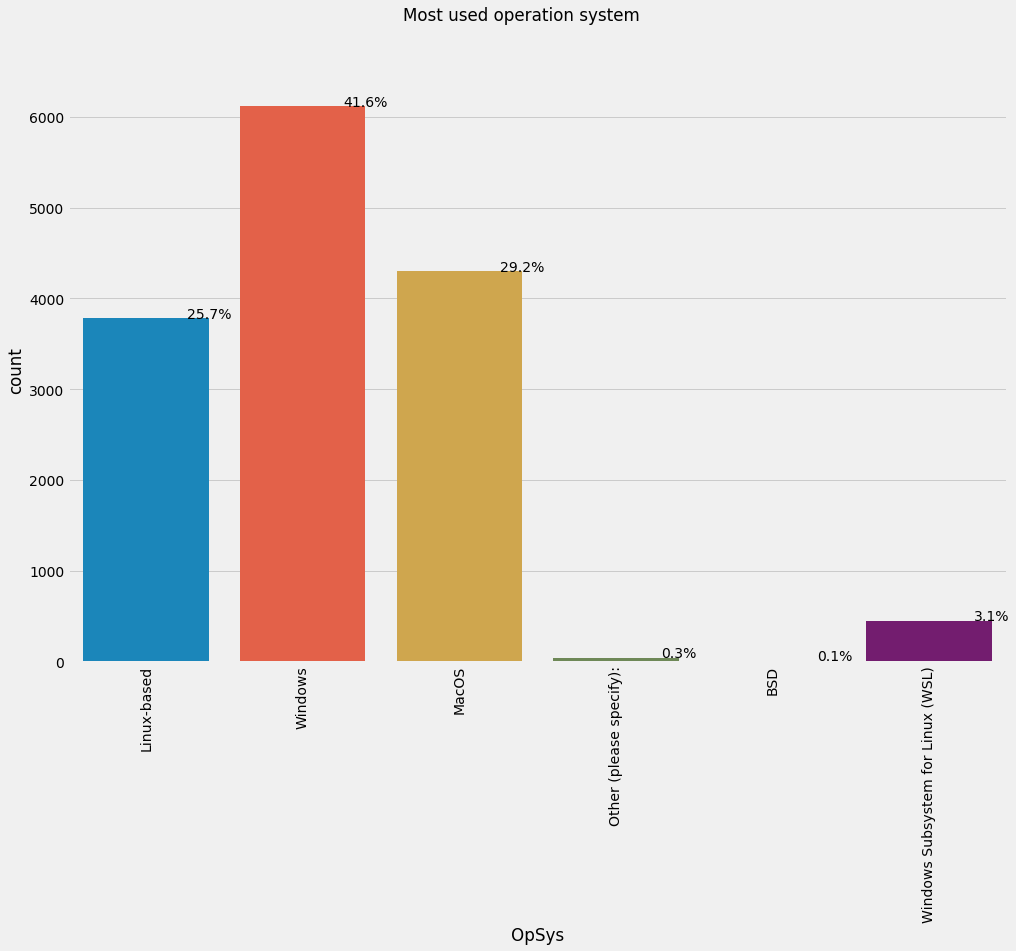

In [912]:
plt.subplots(figsize=(15,10))
plt.style.use('fivethirtyeight')
ax =sns.countplot(x='OpSys', data=df)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    hue = p.get_height()
    ax.annotate(percentage, (x, hue),ha='center')
plt.suptitle('Most used operation system')
plt.xticks(rotation=90)
plt.show()

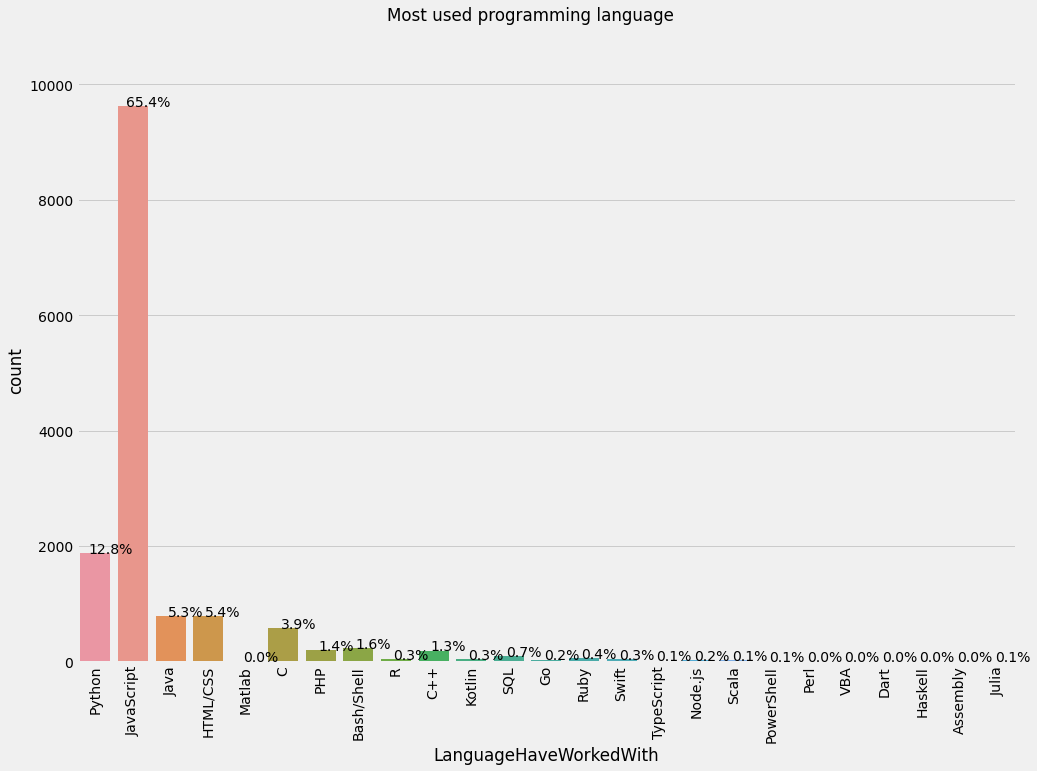

In [913]:
plt.subplots(figsize=(15,10))
plt.style.use('fivethirtyeight')
ax =sns.countplot(x='LanguageHaveWorkedWith', data=df)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    hue = p.get_height()
    ax.annotate(percentage, (x, hue),ha='center')
plt.suptitle('Most used programming language')
plt.xticks(rotation=90)
plt.show()

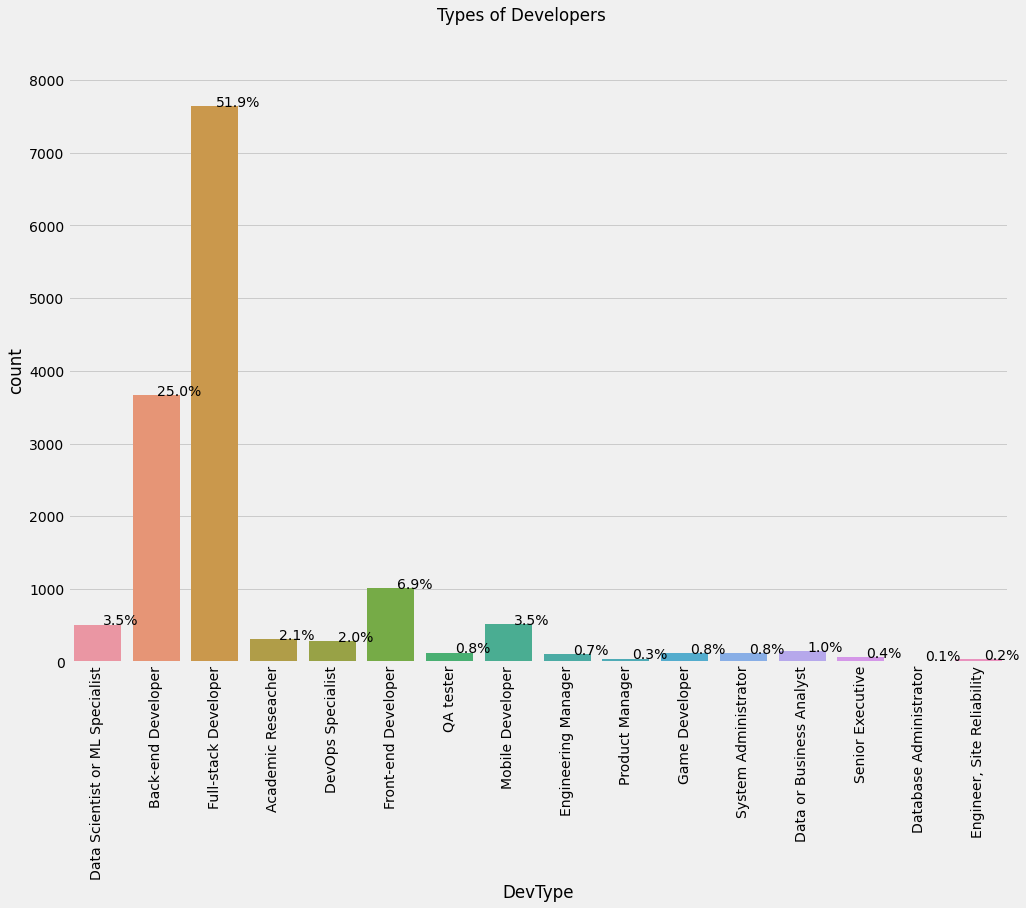

In [914]:
plt.subplots(figsize=(15,10))
plt.style.use('fivethirtyeight')
ax =sns.countplot(x='DevType', data=df)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    hue = p.get_height()
    ax.annotate(percentage, (x, hue),ha='center')
plt.suptitle('Types of Developers')
plt.xticks(rotation=90)
plt.show()

In [915]:
dev_salary = df[['DevType', 'Salary']].pivot_table(index='DevType', values=['Salary'], aggfunc='median')

In [916]:
dev_salary.sort_values(by='Salary', ascending=False)

,Salary
DevType,
Senior Executive,91967.5
"Engineer, Site Reliability",90482.0
Engineering Manager,86478.0
Product Manager,64859.0
DevOps Specialist,58373.0
Back-end Developer,55596.0
Data Scientist or ML Specialist,54049.0
Full-stack Developer,53184.0
Database Administrator,52593.5


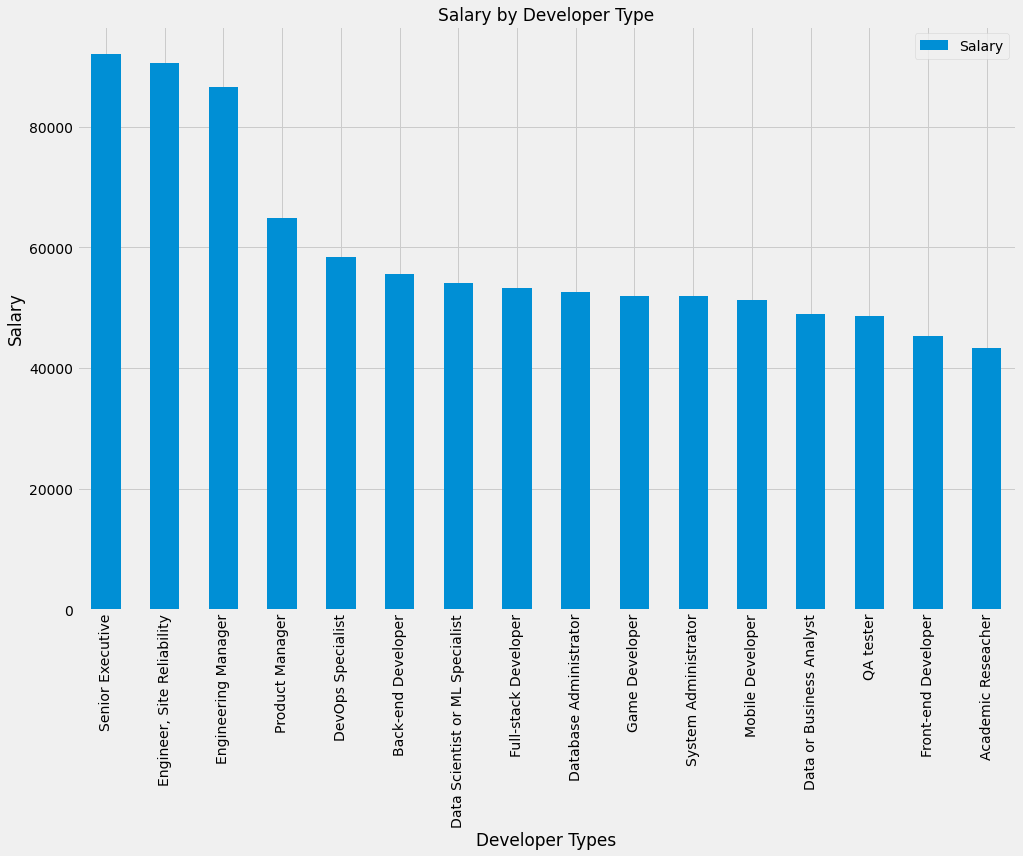

In [917]:
plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('fivethirtyeight')
graph2 = dev_salary.sort_values(by = 'Salary', ascending = False).plot(kind = 'bar')
plt.title('Salary by Developer Type', size=17)
plt.xlabel('Developer Types', size=17)
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show();

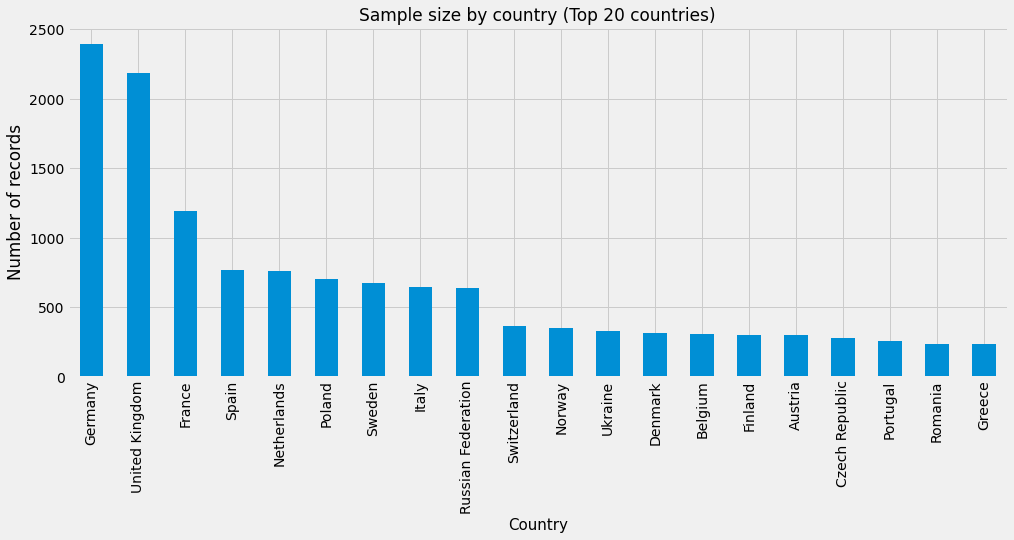

In [918]:
plt.figure(figsize=(15,6))
plt.style.use('fivethirtyeight')
location = df['Country'].value_counts().iloc[:20].plot.bar()
plt.title('Sample size by country (Top 20 countries)', size=17)
plt.xlabel('Country', size=15)
plt.ylabel('Number of records')
plt.show();

In [919]:
df.shape

(14708, 11)

In [920]:
salary_by_country = df[['Country', 'Salary']].pivot_table(index='Country', values=['Salary'], aggfunc='median')

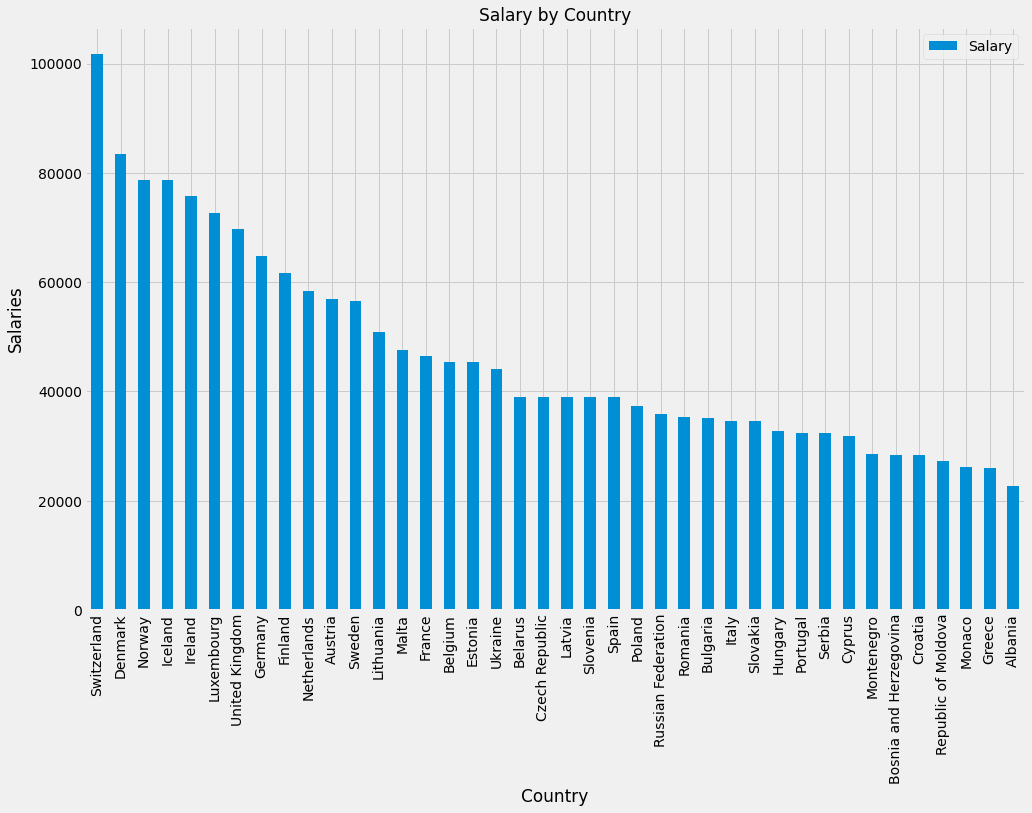

In [921]:
plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('fivethirtyeight')
graph = salary_by_country.sort_values(by = 'Salary', ascending = False).plot(kind = 'bar')
plt.title('Salary by Country', size=17)
plt.xlabel('Country', size=17)
plt.ylabel('Salaries')
plt.xticks(rotation=90)
plt.show();

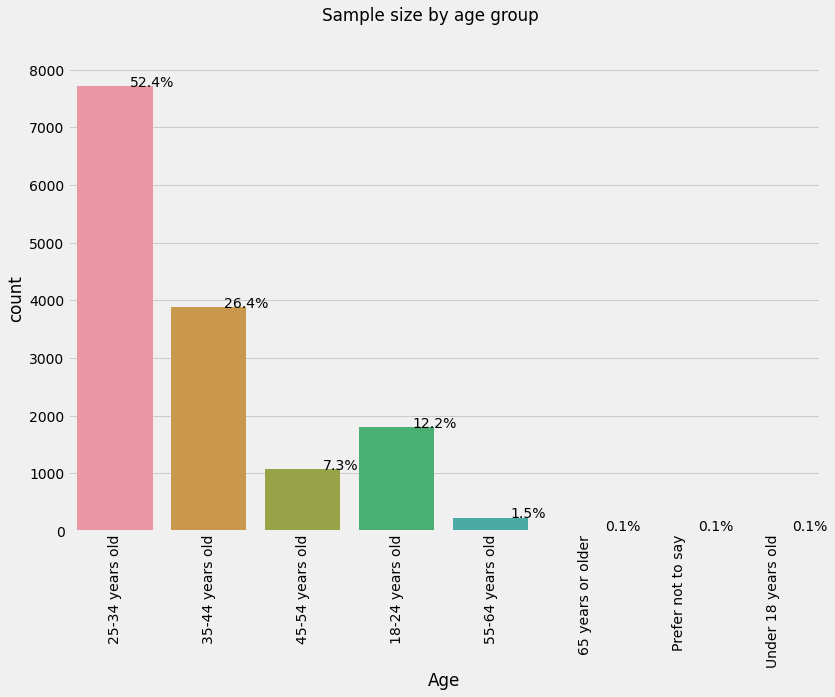

In [922]:
plt.subplots(figsize=(12,8))
plt.style.use('fivethirtyeight')
ax =sns.countplot(x='Age', data=df)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    hue = p.get_height()
    ax.annotate(percentage, (x, hue),ha='center')
plt.suptitle('Sample size by age group')
plt.xticks(rotation=90)
plt.show()

In [923]:
salary_by_age = df[['Age', 'Salary']].pivot_table(index='Age', values=['Salary'], aggfunc='median')

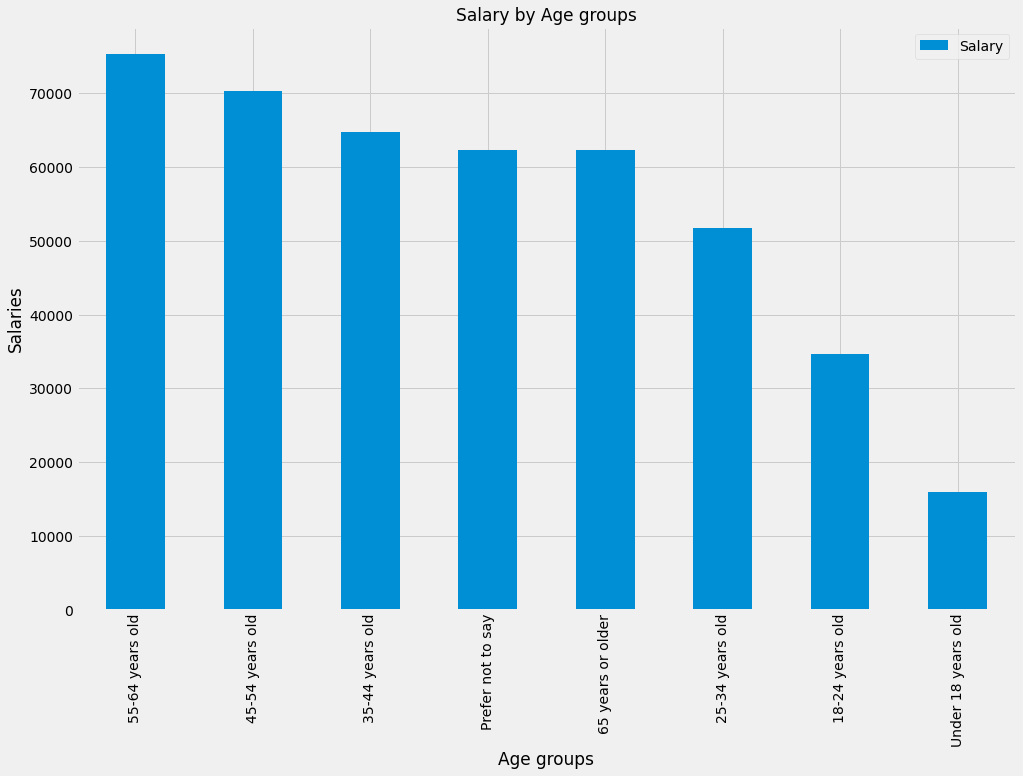

In [924]:
plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('fivethirtyeight')
graph = salary_by_age.sort_values(by = 'Salary', ascending = False).plot(kind = 'bar')
plt.title('Salary by Age groups', size=17)
plt.xlabel('Age groups', size=17)
plt.ylabel('Salaries')
plt.xticks(rotation=90)
plt.show();

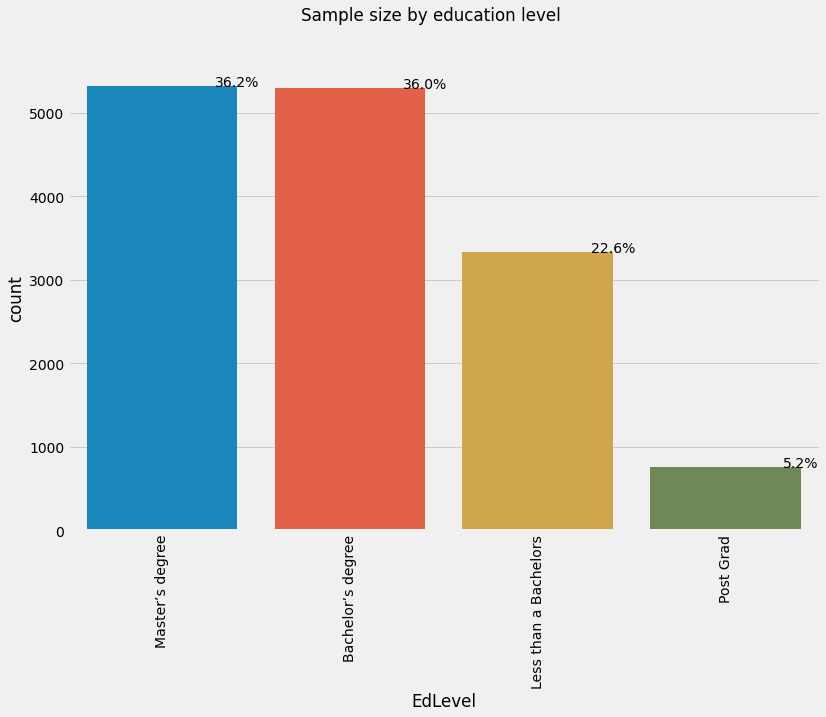

In [925]:
plt.subplots(figsize=(12,8))
plt.style.use('fivethirtyeight')
ax =sns.countplot(x='EdLevel', data=df)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    hue = p.get_height()
    ax.annotate(percentage, (x, hue),ha='center')
plt.suptitle('Sample size by education level')
plt.xticks(rotation=90)
plt.show()

In [926]:
edu_sal=  df[['EdLevel', 'Salary']].pivot_table(index='EdLevel', values=['Salary'], aggfunc='median')

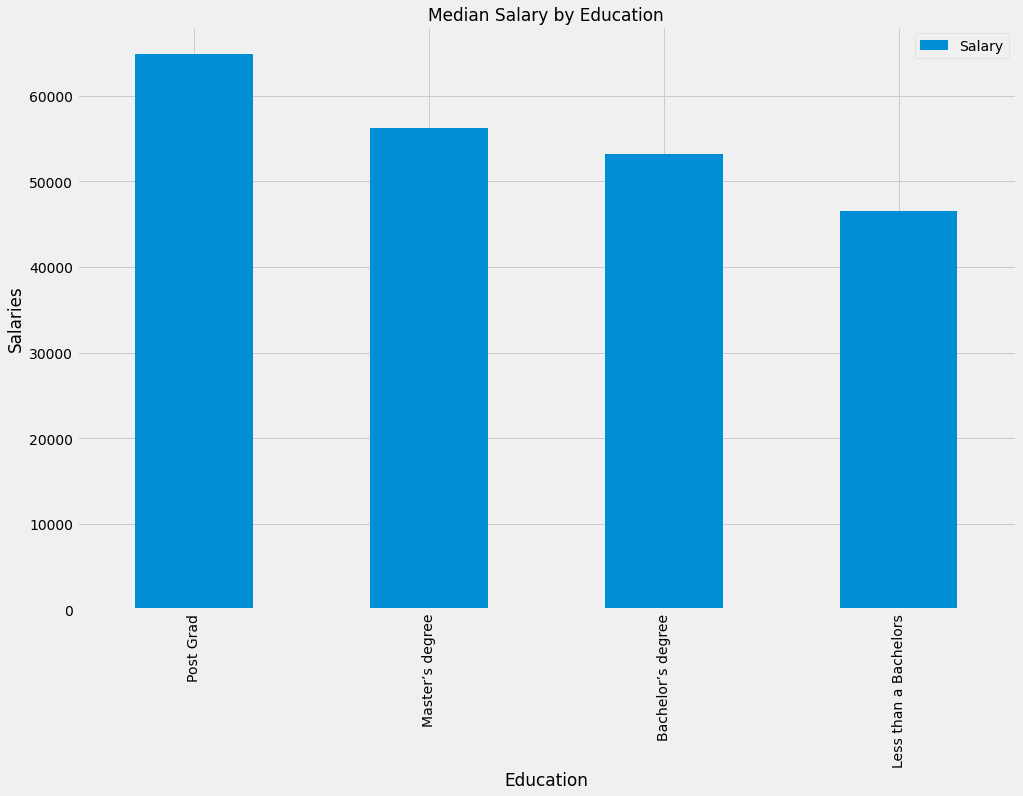

In [927]:
plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('fivethirtyeight')
graph = edu_sal.sort_values(by = 'Salary', ascending = False).plot(kind = 'bar')
plt.title('Median Salary by Education', size=17)
plt.xlabel('Education', size=17)
plt.ylabel('Salaries')
plt.xticks(rotation=90)
plt.show();

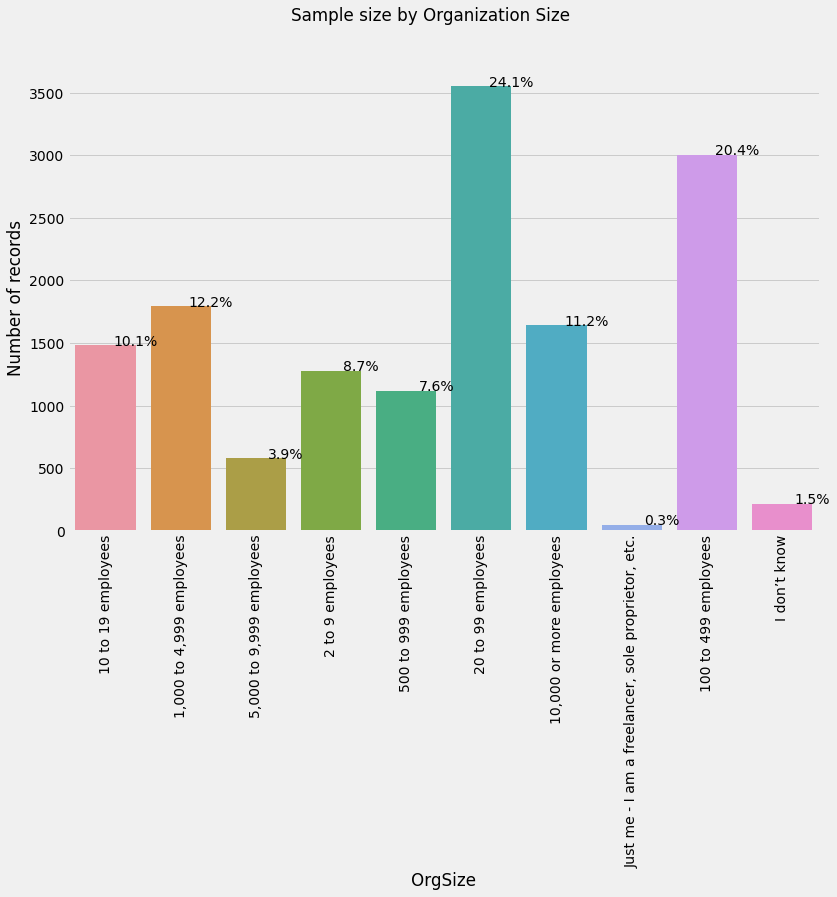

In [928]:
plt.subplots(figsize=(12,8))
plt.style.use('fivethirtyeight')
ax =sns.countplot(x='OrgSize', data=df)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    hue = p.get_height()
    ax.annotate(percentage, (x, hue),ha='center')
plt.suptitle('Sample size by Organization Size')
plt.ylabel('Number of records')
plt.xticks(rotation=90)
plt.show()

In [929]:
org_sal=  df[['OrgSize', 'Salary']].pivot_table(index='OrgSize', values=['Salary'], aggfunc='median')

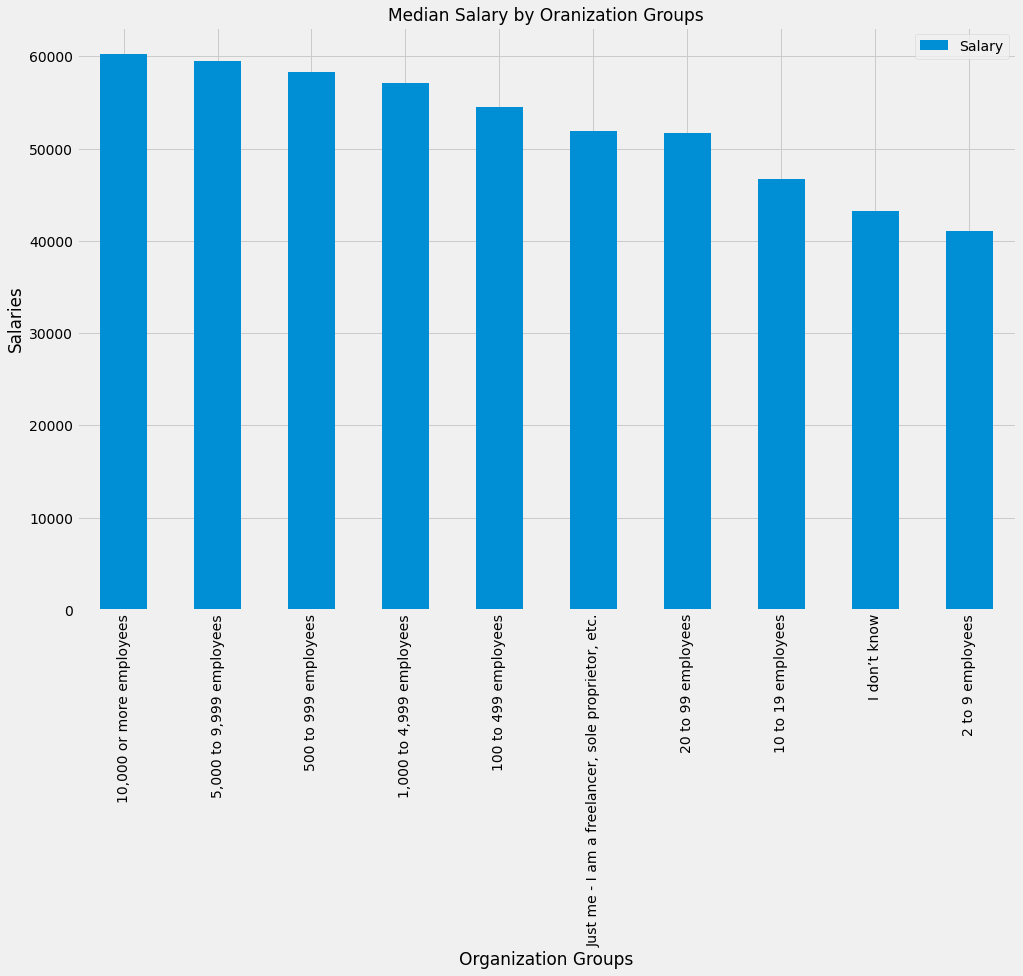

In [930]:
plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('fivethirtyeight')
graph = org_sal.sort_values(by = 'Salary', ascending = False).plot(kind = 'bar')
plt.title('Median Salary by Oranization Groups', size=17)
plt.xlabel('Organization Groups', size=17)
plt.ylabel('Salaries')
plt.xticks(rotation=90)
plt.show();

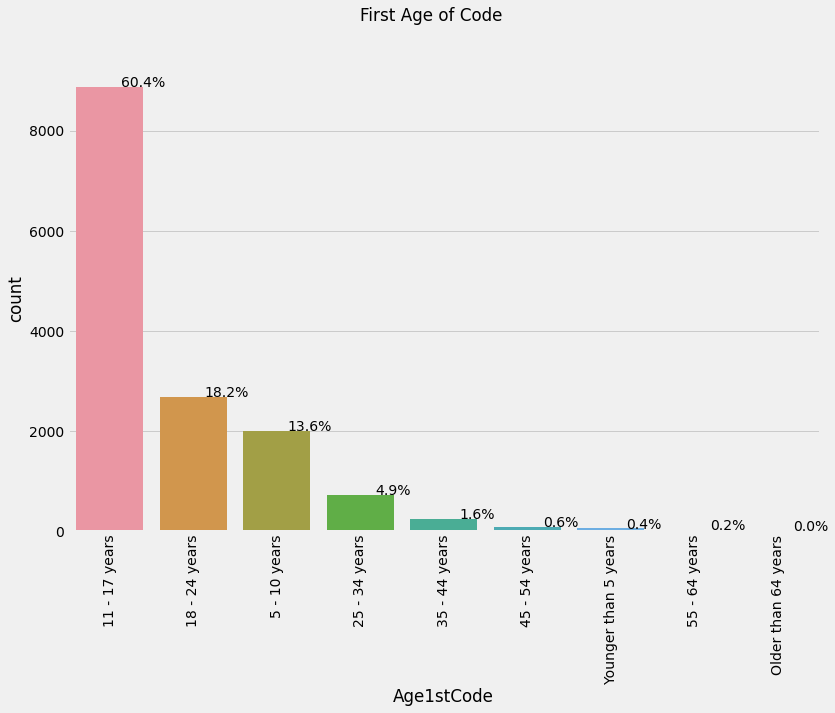

In [931]:
plt.subplots(figsize=(12,8))
plt.style.use('fivethirtyeight')
ax =sns.countplot(x='Age1stCode', data=df)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    hue = p.get_height()
    ax.annotate(percentage, (x, hue),ha='center')
plt.suptitle('First Age of Code')
plt.xticks(rotation=90)
plt.show()

In [932]:
Age_of_Code = df[['Age1stCode', 'Salary']].pivot_table(index='Age1stCode', values=['Salary'], aggfunc='median')

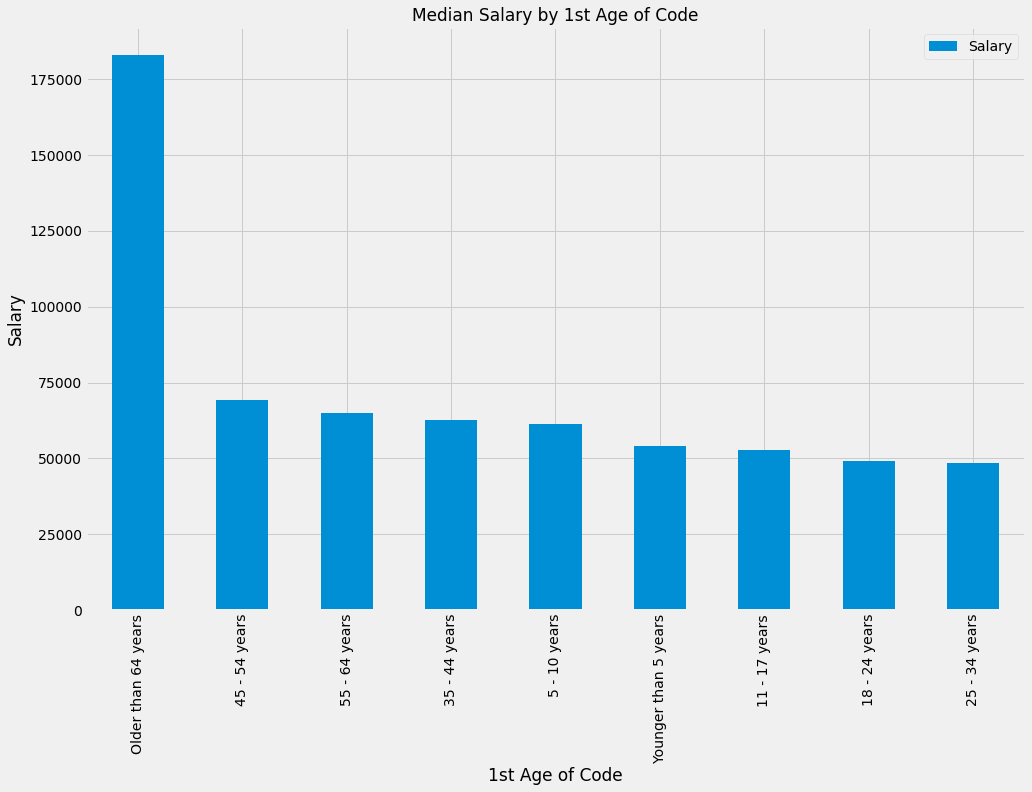

In [933]:
plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('fivethirtyeight')
graph2 = Age_of_Code.sort_values(by = 'Salary', ascending = False).plot(kind = 'bar')
plt.title('Median Salary by 1st Age of Code', size=17)
plt.xlabel('1st Age of Code', size=17)
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show();

In [934]:
salary_by_exper = df[['YearsCodePro', 'Salary']].pivot_table(index='YearsCodePro', values=['Salary'], aggfunc='median')

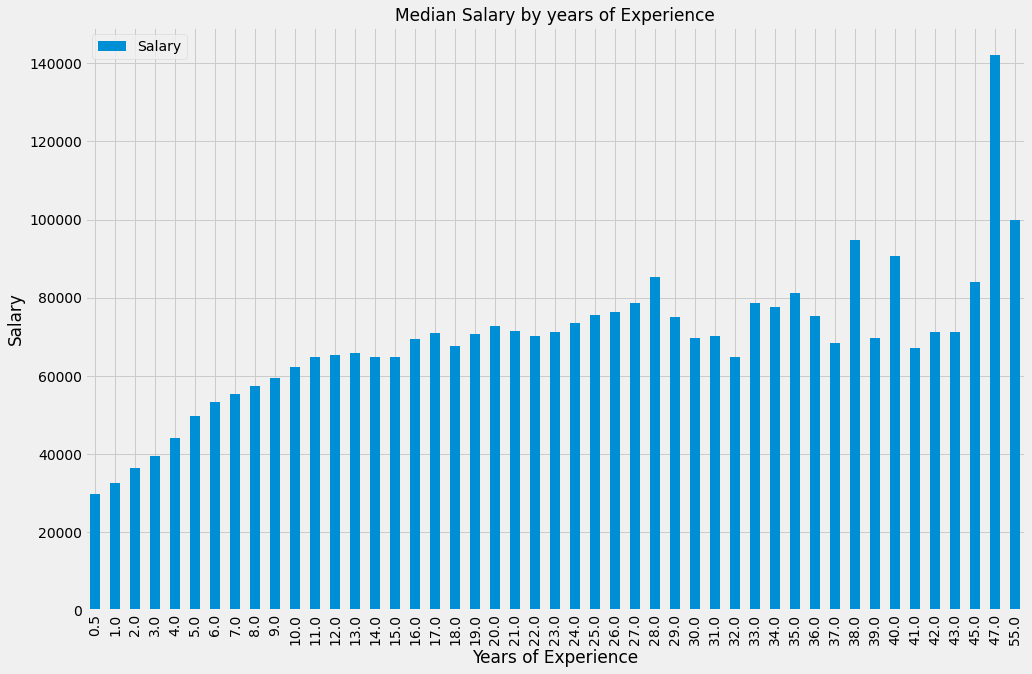

In [935]:
plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('fivethirtyeight')
graph = salary_by_exper.plot(kind='bar')
plt.title('Median Salary by years of Experience', size=17)
plt.xlabel('Years of Experience', size=17)
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show();

In [936]:
df = df.drop("Employment", axis=1)

In [937]:
# Save the cleaned dataset

df.to_csv('cleaned_dataset.csv', index=False)

In [938]:
from sklearn.preprocessing import LabelEncoder

In [939]:
le_ed = LabelEncoder()
df['EdLevel'] = le_ed.fit_transform(df['EdLevel'])
le_age = LabelEncoder()
df['Age'] = le_age.fit_transform(df['Age'])
le_dev = LabelEncoder()
df['DevType'] = le_dev.fit_transform(df['DevType'])
le_op_sys = LabelEncoder()
df['OpSys'] = le_op_sys.fit_transform(df['OpSys'])
le_org_size = LabelEncoder()
df['OrgSize'] = le_org_size.fit_transform(df['OrgSize'])
le_age_1stcode = LabelEncoder()
df['Age1stCode'] = le_age_1stcode.fit_transform(df['Age1stCode'])
le_prog_lang = LabelEncoder()
df['LanguageHaveWorkedWith'] = le_prog_lang.fit_transform(df['LanguageHaveWorkedWith'])

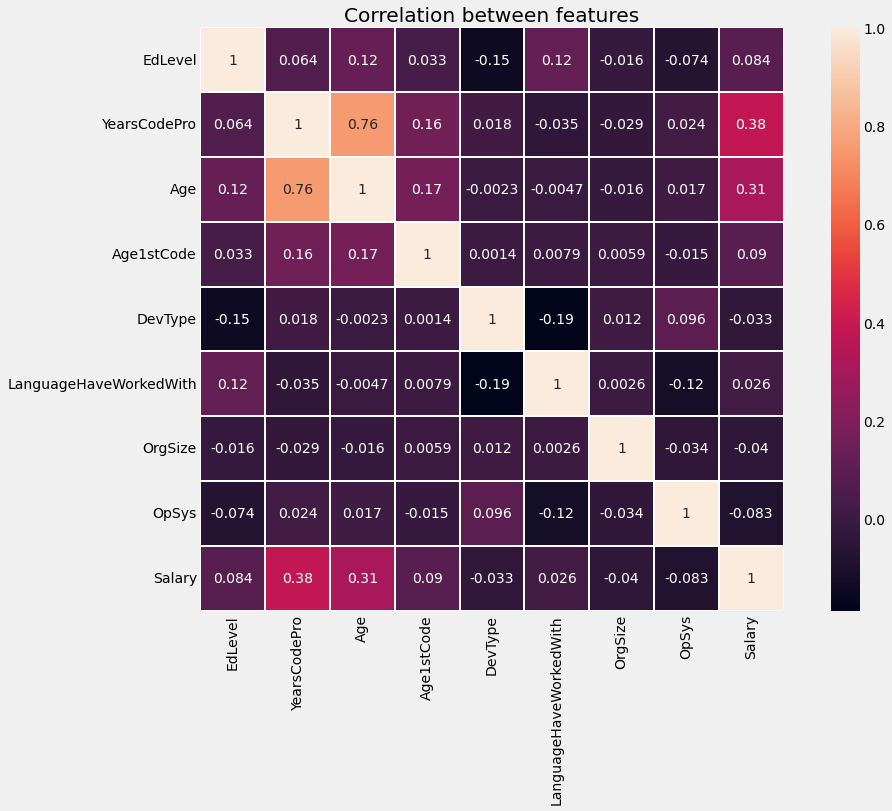

In [940]:
# Create a heatmap to check the correlation between features

corr=df.corr()

sns.heatmap(corr, linewidths=0.01,
            square=True,annot=True)
plt.title('Correlation between features');

## Data transformation 

In [941]:
# Import the cleaned dataset 

df = pd.read_csv('cleaned_dataset.csv')

In [942]:
# Transform to dummies

df = df.merge(pd.get_dummies(df['DevType'], prefix='DevType'),right_index=True, left_index=True)

In [943]:
df.drop(columns='DevType', inplace=True)

In [944]:
df = df.merge(pd.get_dummies(df['EdLevel'], prefix='EdLevel'),right_index=True, left_index=True)

In [945]:
df.drop(columns='EdLevel', inplace=True)

In [946]:
df

,Country,YearsCodePro,Age,Age1stCode,LanguageHaveWorkedWith,OrgSize,OpSys,Salary,DevType_Academic Reseacher,DevType_Back-end Developer,...,DevType_Game Developer,DevType_Mobile Developer,DevType_Product Manager,DevType_QA tester,DevType_Senior Executive,DevType_System Administrator,EdLevel_Bachelor’s degree,EdLevel_Less than a Bachelors,EdLevel_Master’s degree,EdLevel_Post Grad
0,Sweden,4.0,25-34 years old,11 - 17 years,Python,10 to 19 employees,Linux-based,51552.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Spain,5.0,25-34 years old,11 - 17 years,JavaScript,10 to 19 employees,Linux-based,46482.0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,Germany,6.0,25-34 years old,11 - 17 years,Java,"1,000 to 4,999 employees",Linux-based,77290.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,France,2.0,25-34 years old,11 - 17 years,JavaScript,10 to 19 employees,Linux-based,38915.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Germany,18.0,35-44 years old,11 - 17 years,JavaScript,"1,000 to 4,999 employees",Linux-based,77831.0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14703,Netherlands,6.0,25-34 years old,18 - 24 years,Python,"10,000 or more employees",Windows,86478.0,0,1,...,0,0,0,0,0,0,0,0,0,1
14704,Austria,13.0,35-44 years old,5 - 10 years,JavaScript,100 to 499 employees,Windows Subsystem for Linux (WSL),83236.0,0,0,...,0,0,0,0,0,0,0,0,1,0
14705,France,4.0,25-34 years old,5 - 10 years,JavaScript,2 to 9 employees,Windows,35672.0,0,0,...,0,0,0,0,0,0,0,0,1,0
14706,Germany,12.0,25-34 years old,11 - 17 years,JavaScript,"10,000 or more employees",MacOS,129718.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [947]:
df.Age.unique()

array(['25-34 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '55-64 years old', '65 years or older',
       'Prefer not to say', 'Under 18 years old'], dtype=object)

In [948]:
# Transform Age column

df['age_extr'] = df['Age'].copy()
df['age_extr'] = df['age_extr'].str.replace('Prefer not to say','0')
df['age_extr'] = df['age_extr'].str.replace('Under 18 years old','18')

In [949]:
le_age = LabelEncoder()
df['age_extr_trans'] = le_age.fit_transform(df['age_extr'])

In [950]:
df = df.drop(columns=['Age', 'age_extr']).rename(columns={'age_extr_trans':'age_transformed'})

In [951]:
# Target mean encoding

df = df.merge(df.groupby('Country')['Salary'].mean().reset_index().rename(columns={'Salary':'aver_count_salary'}), on='Country')

In [952]:
df[['Country', 'aver_count_salary']].drop_duplicates().to_csv('average_salaries.csv', index=False)

In [953]:
df.drop(columns='Country', inplace=True)

In [954]:
# le_coun = LabelEncoder()
# df['Country'] = le_coun.fit_transform(df['Country'])

In [955]:
# Drop the unnecessary columns

df = df.drop(['Age1stCode','OrgSize',
              'LanguageHaveWorkedWith',
              'OpSys' ],
            axis=1)


In [957]:
df['percentage']= df.Salary/df.aver_count_salary

# Check for outliers

In [755]:
df[df.percentage<=0.4].count()

Unnamed: 0                                 666
YearsCodePro                               666
Salary                                     666
DevType_Academic Reseacher                 666
DevType_Back-end Developer                 666
DevType_Data Scientist or ML Specialist    666
DevType_Data or Business Analyst           666
DevType_Database Administrator             666
DevType_DevOps Specialist                  666
DevType_Engineer, Site Reliability         666
DevType_Engineering Manager                666
DevType_Front-end Developer                666
DevType_Full-stack Developer               666
DevType_Game Developer                     666
DevType_Mobile Developer                   666
DevType_Product Manager                    666
DevType_QA tester                          666
DevType_Senior Executive                   666
DevType_System Administrator               666
EdLevel_Bachelor’s degree                  666
EdLevel_Less than a Bachelors              666
EdLevel_Maste

In [756]:
df[(df['percentage']>1.5) & (df['YearsCodePro']<3)].count()

Unnamed: 0                                 31
YearsCodePro                               31
Salary                                     31
DevType_Academic Reseacher                 31
DevType_Back-end Developer                 31
DevType_Data Scientist or ML Specialist    31
DevType_Data or Business Analyst           31
DevType_Database Administrator             31
DevType_DevOps Specialist                  31
DevType_Engineer, Site Reliability         31
DevType_Engineering Manager                31
DevType_Front-end Developer                31
DevType_Full-stack Developer               31
DevType_Game Developer                     31
DevType_Mobile Developer                   31
DevType_Product Manager                    31
DevType_QA tester                          31
DevType_Senior Executive                   31
DevType_System Administrator               31
EdLevel_Bachelor’s degree                  31
EdLevel_Less than a Bachelors              31
EdLevel_Master’s degree           

In [757]:

df[(df['percentage']>1.5) & (df['YearsCodePro']<3)].count()

Unnamed: 0                                 31
YearsCodePro                               31
Salary                                     31
DevType_Academic Reseacher                 31
DevType_Back-end Developer                 31
DevType_Data Scientist or ML Specialist    31
DevType_Data or Business Analyst           31
DevType_Database Administrator             31
DevType_DevOps Specialist                  31
DevType_Engineer, Site Reliability         31
DevType_Engineering Manager                31
DevType_Front-end Developer                31
DevType_Full-stack Developer               31
DevType_Game Developer                     31
DevType_Mobile Developer                   31
DevType_Product Manager                    31
DevType_QA tester                          31
DevType_Senior Executive                   31
DevType_System Administrator               31
EdLevel_Bachelor’s degree                  31
EdLevel_Less than a Bachelors              31
EdLevel_Master’s degree           

In [758]:
# Drop the outliers

df = df[~((df['percentage']<0.4) & (df['YearsCodePro']>2))]
df = df[~((df['percentage']>1.5) & (df['YearsCodePro']<3))]
df = df[~((df['percentage']<1) & (df['YearsCodePro']>15))]

In [640]:
df.columns

Index(['YearsCodePro', 'Salary', 'DevType_Academic Reseacher',
       'DevType_Back-end Developer', 'DevType_Data Scientist or ML Specialist',
       'DevType_Data or Business Analyst', 'DevType_Database Administrator',
       'DevType_DevOps Specialist', 'DevType_Engineer, Site Reliability',
       'DevType_Engineering Manager', 'DevType_Front-end Developer',
       'DevType_Full-stack Developer', 'DevType_Game Developer',
       'DevType_Mobile Developer', 'DevType_Product Manager',
       'DevType_QA tester', 'DevType_Senior Executive',
       'DevType_System Administrator', 'EdLevel_Bachelor’s degree',
       'EdLevel_Less than a Bachelors', 'EdLevel_Master’s degree',
       'EdLevel_Post Grad', 'age_transformed', 'aver_count_salary',
       'percentage'],
      dtype='object')

In [641]:
df.drop(columns='percentage', inplace=True)

In [642]:
# Using this method because changing directly the variable is misbehaving in Streamlit

df.loc[df['EdLevel_Post Grad']==1,"newMaster's degree"]=1
df["newMaster's degree"] = df["newMaster's degree"].fillna(df["EdLevel_Master’s degree"])
df["EdLevel_Master’s degree"] = df["newMaster's degree"]
df.loc[df["EdLevel_Master’s degree"]==1,"newBachelor's degree"]=1
df["newBachelor's degree"] = df["newBachelor's degree"].fillna(df["EdLevel_Bachelor’s degree"])
df["EdLevel_Bachelor’s degree"] = df["newBachelor's degree"]

In [644]:
df.drop(columns=["newBachelor's degree", "newMaster's degree"], inplace=True)

In [645]:
# Split the dataset 

X = df.drop("Salary", axis=1)
y = df["Salary"]

In [646]:
X.columns.values

array(['YearsCodePro', 'DevType_Academic Reseacher',
       'DevType_Back-end Developer',
       'DevType_Data Scientist or ML Specialist',
       'DevType_Data or Business Analyst',
       'DevType_Database Administrator', 'DevType_DevOps Specialist',
       'DevType_Engineer, Site Reliability',
       'DevType_Engineering Manager', 'DevType_Front-end Developer',
       'DevType_Full-stack Developer', 'DevType_Game Developer',
       'DevType_Mobile Developer', 'DevType_Product Manager',
       'DevType_QA tester', 'DevType_Senior Executive',
       'DevType_System Administrator', 'EdLevel_Bachelor’s degree',
       'EdLevel_Less than a Bachelors', 'EdLevel_Master’s degree',
       'EdLevel_Post Grad', 'age_transformed', 'aver_count_salary'],
      dtype=object)

In [647]:
X.shape

(13692, 23)

## Import the ML libraries 

In [960]:
from sklearn.model_selection import train_test_split

In [958]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from math import sqrt

In [959]:
from sklearn.model_selection import cross_val_score, cross_validate, KFold, cross_val_predict

In [962]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [975]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import IsolationForest

In [967]:
import sklearn.metrics

In [654]:
# Grid Search method in order to find the best tuning parameters

#preds = {} 
#for max_depth in range(4,16,2):
    
# for n_estimator in range(100,5000,100):
#     model_gb = GradientBoostingRegressor(random_state=42,
#                             learning_rate=0.05,         
#                             n_estimators=n_estimator,
#                             subsample=0.7,         
#                             max_depth=6,
#                             max_features='sqrt') 
#     model_gb.fit(X_train.values, y_train.values)
#     pred_gb =  model_gb.predict(X_test.values)
#     preds[(max_depth,n_estimator)]={'RMSE':(round(sqrt(mean_squared_error(y_test.values, pred_gb)),2)),
#                         'MAPE':(round(mean_absolute_percentage_error(y_test.values, pred_gb),2)*100),
#                         'R_squared':(round(r2_score(y_test.values,pred_gb),2))}
#preds

In [976]:

model_rf = RandomForestRegressor(random_state=42,
                            n_estimators=600,                        
                            max_depth=13,                        
                            bootstrap=True,
                            max_features=17)
model_lr = LinearRegression()
model_dt = DecisionTreeRegressor(random_state=42,
                           splitter='random',                      
                            max_depth=150,
                           max_leaf_nodes=100,
                           max_features='sqrt')
model_gb = GradientBoostingRegressor(random_state=42,
                            learning_rate=0.05,         
                            n_estimators=200,
                            subsample=0.7,         
                            max_depth=6,
                            max_features='sqrt') 
                           #max_features=round(0.8*len(X.columns.values)))
model_nn = MLPRegressor(random_state=1, max_iter=400, hidden_layer_sizes=(250))
model_svm = SVR()
model_nb = GaussianNB()
model_knn = KNeighborsRegressor()

In [977]:
model_rf.fit(X_train.values,y_train.values)
model_lr.fit(X_train.values, y_train.values)
model_dt.fit(X_train.values, y_train.values)
model_gb.fit(X_train.values, y_train.values)
model_nn.fit(X_train.values, y_train.values)
model_svm.fit(X_train.values, y_train.values)
model_nb.fit(X_train.values, y_train.values)
model_knn.fit(X_train.values, y_train.values)

KNeighborsRegressor()

In [978]:
pred_rf = model_rf.predict(X_test.values) 
pred_lr =  model_lr.predict(X_test.values)
pred_dt = model_dt.predict(X_test.values)
pred_gb =  model_gb.predict(X_test.values)
pred_nn = model_nn.predict(X_test.values)
pred_svm =  model_svm.predict(X_test.values)
pred_nb =  model_nb.predict(X_test.values)
pred_knn = model_knn.predict(X_test.values)

In [661]:
print ("RMSE rf: $" + str(round(sqrt(mean_squared_error(y_test.values, pred_rf)),2)))
print ("MAPE rf: " + str(round(mean_absolute_percentage_error(y_test.values, pred_rf),2)*100))
print("R_squared: " + str(round(r2_score(y_test.values,pred_rf),2)))
print ("RMSE lr: $" + str(round(sqrt(mean_squared_error(y_test.values, pred_lr)),2)))
print ("MAPE lr " + str(round(mean_absolute_percentage_error(y_test.values, pred_lr),2)*100))
print("R_squared: " + str(round(r2_score(y_test.values,pred_lr),2)))
print ("RMSE dt: $" + str(round(sqrt(mean_squared_error(y_test.values, pred_dt)),2)))
print ("MAPE dt: " + str(round(mean_absolute_percentage_error(y_test.values, pred_dt),2)*100))
print("R_squared: " + str(round(r2_score(y_test.values,pred_dt),2)))
print ("RMSE gb: $" + str(round(sqrt(mean_squared_error(y_test.values, pred_gb)),2)))
print ("MAPE gb: " + str(round(mean_absolute_percentage_error(y_test.values, pred_gb),2)*100))
print("R_squared: " + str(round(r2_score(y_test.values,pred_gb),2)))
print ("RMSE nn: $" + str(round(sqrt(mean_squared_error(y_test.values, pred_nn)),2)))
print ("MAPE nn: " + str(round(mean_absolute_percentage_error(y_test.values, pred_nn),2)*100))
print("R_squared: " + str(round(r2_score(y_test.values,pred_nn),2)))
print ("RMSE svm: $" + str(round(sqrt(mean_squared_error(y_test.values, pred_svm)),2)))
print ("MAPE svm: " + str(round(mean_absolute_percentage_error(y_test.values, pred_svm),2)*100))       
print("R_squared: " + str(round(r2_score(y_test.values,pred_svm),2)))
print ("RMSE nb: $" + str(round(sqrt(mean_squared_error(y_test.values, pred_nb)),2)))
print ("MAPE rf: " + str(round(mean_absolute_percentage_error(y_test.values, pred_nb),2)*100))       
print("R_squared: " + str(round(r2_score(y_test.values,pred_nb),2)))
print ("RMSE knn: $" + str(round(sqrt(mean_squared_error(y_test.values, pred_knn)),2)))
print ("MAPE rf: " + str(round(mean_absolute_percentage_error(y_test.values, pred_knn),2)*100))       
print("R_squared: " + str(round(r2_score(y_test.values,pred_knn),2)))

RMSE rf: $23747.08
MAPE rf: 28.000000000000004
R_squared: 0.46
RMSE lr: $23360.95
MAPE lr 28.999999999999996
R_squared: 0.48
RMSE dt: $28312.17
MAPE dt: 43.0
R_squared: 0.23
RMSE gb: $22650.03
MAPE gb: 27.0
R_squared: 0.51
RMSE nn: $24625.09
MAPE nn: 30.0
R_squared: 0.42
RMSE svm: $32691.39
MAPE svm: 49.0
R_squared: -0.02
RMSE nb: $33568.38
MAPE rf: 38.0
R_squared: -0.08
RMSE knn: $25171.23
MAPE rf: 30.0
R_squared: 0.39


In [969]:
cv_gb = cross_val_score(model_gb, X, y.values, scoring='neg_mean_absolute_percentage_error', cv=10,)

In [971]:
cv_gb.mean()

-0.28820138472279594

In [964]:
cv_gb

array([0.36604462, 0.39709258, 0.38681729, 0.45068081, 0.3250643 ,
       0.43043073, 0.46476117, 0.39161437, 0.58600144, 0.5753743 ])

In [662]:
# cv_rf = cross_val_predict(model_rf, X, y.values, cv=10,)
# cv_lr = cross_val_predict(model_lr, X, y.values, cv=10,)
# cv_dt = cross_val_predict(model_dt, X, y.values, cv=10,)
# cv_gb = cross_val_predict(model_gb, X, y.values, cv=10,)
# cv_nn = cross_val_predict(model_nn, X, y.values, cv=10,)
# cv_svm = cross_val_predict(model_svm, X, y.values, cv=10,)
# cv_nb = cross_val_predict(model_nb, X, y.values, cv=10,)
# cv_knn = cross_val_predict(model_knn, X, y.values, cv=10,)

In [663]:
# print ("RMSE cv_rf: $" + str(round(sqrt(mean_squared_error(y.values, cv_rf)),2)))
# print("R_squared: " + str(round(r2_score(y.values,cv_rf),2)))
# print ("RMSE cv_lr: $" + str(round(sqrt(mean_squared_error(y.values, cv_lr)),2)))
# print("R_squared: " + str(round(r2_score(y.values,cv_lr),2)))
# print ("RMSE cv_dt: $" + str(round(sqrt(mean_squared_error(y.values, cv_dt)),2)))
# print("R_squared: " + str(round(r2_score(y.values,cv_dt),2)))
# print ("RMSE cv_gb: $" + str(round(sqrt(mean_squared_error(y.values, cv_gb)),2)))
# print("R_squared: " + str(round(r2_score(y.values,cv_gb),2)))
# print ("RMSE cv_nn: $" + str(round(sqrt(mean_squared_error(y.values, cv_nn)),2)))
# print("R_squared: " + str(round(r2_score(y.values,cv_nn),2)))
# print ("RMSE cv_svm: $" + str(round(sqrt(mean_squared_error(y.values, cv_svm)),2)))
# print("R_squared: " + str(round(r2_score(y.values,cv_svm),2)))
# print ("RMSE cv_nb: $" + str(round(sqrt(mean_squared_error(y.values, cv_nb)),2)))
# print("R_squared: " + str(round(r2_score(y.values,cv_nb),2)))
# print ("RMSE cv_knn: $" + str(round(sqrt(mean_squared_error(y.values, cv_knn)),2)))
# print("R_squared: " + str(round(r2_score(y.values,cv_knn),2)))

## Testing

In [683]:
to_predict = pd.DataFrame(columns= ['YearsCodePro', 'DevType_Academic Reseacher',
       'DevType_Back-end Developer',
       'DevType_Data Scientist or ML Specialist',
       'DevType_Data or Business Analyst',
       'DevType_Database Administrator', 'DevType_DevOps Specialist',
       'DevType_Engineer, Site Reliability',
       'DevType_Engineering Manager', 'DevType_Front-end Developer',
       'DevType_Full-stack Developer', 'DevType_Game Developer',
       'DevType_Mobile Developer', 'DevType_Product Manager',
       'DevType_QA tester', 'DevType_Senior Executive',
       'DevType_System Administrator', 'EdLevel_Bachelor’s degree',
       'EdLevel_Less than a Bachelors', 'EdLevel_Master’s degree',
       'EdLevel_Post Grad', 'age_transformed', 'aver_count_salary'])
to_predict.loc[0,:]=None


In [684]:
developer_type = 'Data Scientist or ML Specialist'

In [685]:
education = 'Master’s degree'

In [686]:
experience = 1

In [687]:
age = '35-44 years old'

In [688]:
country = 'Austria'

In [689]:
average_salaries=pd.read_csv('average_salaries.csv')

In [690]:
age_dict = {'Prefer not to say':0,
             '18-24 years old':1,
             '25-34 years old':2,
             '35-44 years old':3,
             '45-54 years old':4,
             '55-64 years old':5,
             '65 years or older':6
              }


In [691]:
to_predict[f'DevType_{developer_type}'] = 1 
to_predict[f'EdLevel_{education}'] = 1
to_predict['YearsCodePro'] =experience
to_predict['age_transformed'] = age_dict[age]
to_predict['aver_count_salary'] = average_salaries[average_salaries['Country'] == country]['aver_count_salary'].values[0]

In [692]:
if to_predict['EdLevel_Post Grad'][0]==1:
            to_predict.loc[0,"EdLevel_Master’s degree"]=1
            to_predict.loc[0,"EdLevel_Bachelor’s degree"]=1
	
if to_predict["EdLevel_Master’s degree"][0]==1:
            to_predict.loc[0,"EdLevel_Bachelor’s degree"]=1

In [693]:
to_predict = to_predict.fillna(0)
Xn = to_predict.to_numpy()

In [979]:
y_pred_final = model_gb.predict(Xn)
y_pred_final

array([42363.88923891])

## Saving the model as pickle

In [695]:
import pickle

In [696]:
gbmod = {"model":model_gb}
with open('salary_model_gb2.pkl', 'wb') as file1:
    pickle.dump(gbmod, file1)

In [697]:
with open('salary_model_gb2.pkl', 'rb') as file1:
    test = pickle.load(file1)
    


In [699]:
val_test = test["model"]
val_test.predict(Xn)

array([38965.8442964])

In [676]:
#[_ for _ in X.columns.values if _ not in to_predict.columns.values]

In [677]:
#[_ for _ in to_predict.columns.values if _ not in X.columns.values]

In [982]:
import matplotlib.lines as mlines

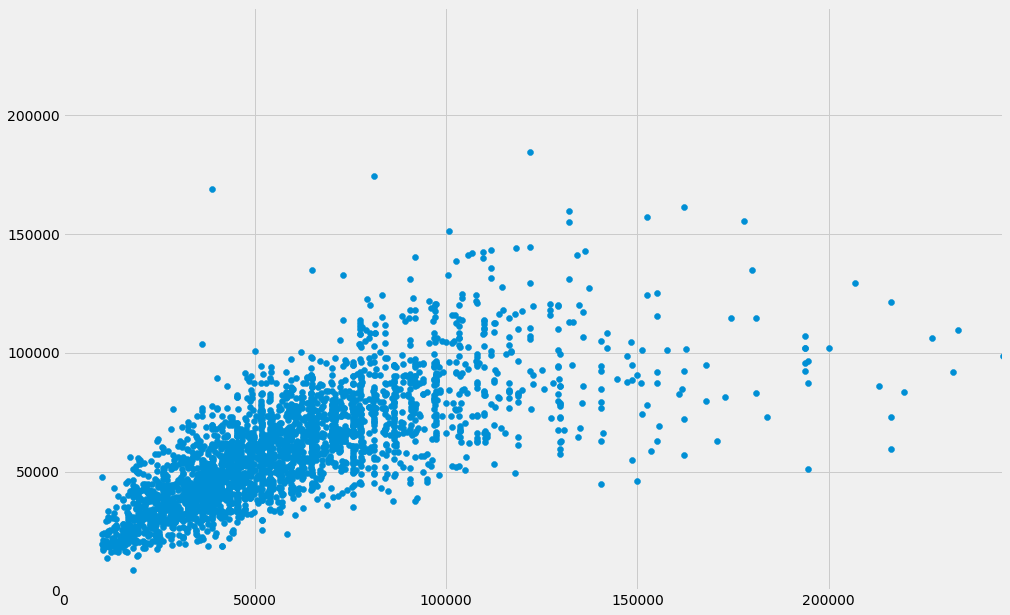

In [989]:
plt.scatter(y_test, pred_gb)
